## View colored parametric map previously generated from QuantUS workflow

This colored parametric map uses a pre-defined colormap to visualize the numerical values of a parametric map.

In the section after this, we will view the numerical values behind the colored parametric map, which can
also be used to make a new visualization with a different colormap.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# adjust inputs for 2D or 3D case and run cells accordingly
im_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/PARAMAP_RESULTS/image.npy'

im = np.load(im_path)

In [ ]:
numerical_paramap_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/PARAMAP_RESULTS/PE_full_TIC_numerical.npy'
pixdims_path = '/home/das/QuantUS_Projs/QuantUS-Plugins-CEUS/PARAMAP_RESULTS/pix_dims.npy'

pixdims = np.load(pixdims_path)
numerical_paramap = np.load(numerical_paramap_path)

In [15]:
im.shape, numerical_paramap.shape, pixdims

((516, 476, 635, 3), (476, 635), array([0.05, 0.05]))

In [16]:
np.nanmax(numerical_paramap), np.nanmin(numerical_paramap)

(np.float32(1.0238966), np.float32(0.04528889))

## 2D parametric map viewing demo

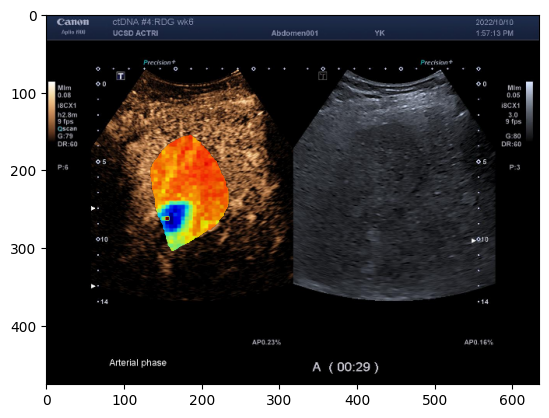

In [23]:
frame = 250

plt.imshow(im[frame], cmap='gray')
plt.imshow(numerical_paramap, cmap='jet', alpha=0.9)

## 3D visualization of parametric map

In [36]:
# These pixdims may need to be read in the reverse order depending on how the data is structured.
affine = np.eye(4)
for i, dim in enumerate(pixdims):
    affine[i, i] = dim

In [37]:
import napari

viewer = napari.Viewer()
viewer.add_image(im.T, name='Image', colormap='gray', blending='additive', affine=affine)
viewer.add_image(numerical_paramap.T, name='Parametric Map', colormap='turbo', blending='additive', opacity=0.7, affine=affine)

<Image layer 'Parametric Map' at 0x7f6b6cb5d8d0>